<a href="https://colab.research.google.com/github/mms-11/ML_algorithms/blob/main/LR__NB__kNN__SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title abrir meu drive
from google.colab import drive

drive.mount('/content/MyDrive')



Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [ ]:
# @title importar bibliotecas
import pandas as pd

import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np


In [ ]:
# @title Ler dataset diabetes
df = pd.read_csv('/content/MyDrive/My Drive/diabetes.csv')

df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [ ]:
# @title treinar base de dados
from sklearn.model_selection import train_test_split

X = df.drop(columns=['class'])
Y = df['class']

# Separando os dados em treinamento(75%) e teste(25%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)


In [ ]:
# @title GERAR ARVORE DE DECISAO
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

In [ ]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth =1,min_samples_leaf = 30)



dt.fit(X_train, Y_train)
arvore = dt.predict(X_test)
# tree.plot_tree(dt)

tree_graph_to_png(dt, feature_names=X_train.columns,
                 png_file_to_save='dt.png')


In [ ]:
# @title arvore aleatoria
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, Y_train)

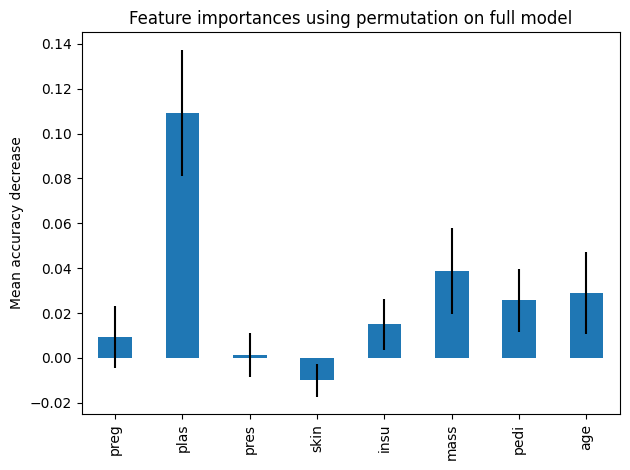

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(rf, X_test, Y_test,n_repeats=30, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
# @title testando o modelo arvore aleatoria
from sklearn.metrics import accuracy_score

Yhat = rf.predict(X_test)

print("Acurácia dos dados de teste  : ", accuracy_score(Y_test,Yhat))

Acurácia dos dados de teste  :  0.7552083333333334


In [ ]:
# Returning the class probabilities if necessary --- obs.: class yes
rf.predict_proba(X_test)[:,1]

array([0.34, 0.69, 0.42, 0.21, 0.52, 0.87, 0.58, 0.37, 0.24, 0.29, 0.66,
       0.33, 0.22, 0.74, 0.11, 0.16, 0.02, 0.87, 0.12, 0.14, 0.77, 0.6 ,
       0.72, 0.03, 0.05, 0.3 , 0.09, 0.37, 0.52, 0.02, 0.33, 0.  , 0.14,
       0.93, 0.01, 0.53, 0.44, 0.54, 0.09, 0.27, 0.67, 0.03, 0.34, 0.01,
       0.38, 0.8 , 0.28, 0.03, 0.95, 0.7 , 0.02, 0.28, 0.7 , 0.  , 0.79,
       0.85, 0.6 , 0.12, 0.31, 0.02, 0.53, 0.51, 0.12, 0.65, 0.12, 0.59,
       0.19, 0.14, 0.09, 0.27, 0.31, 0.72, 0.19, 0.08, 0.57, 0.08, 0.44,
       0.32, 0.51, 0.09, 0.01, 0.36, 0.23, 0.43, 0.73, 0.21, 0.81, 0.79,
       0.24, 0.12, 0.52, 0.42, 0.01, 0.01, 0.06, 0.86, 0.75, 0.13, 0.58,
       0.64, 0.06, 0.58, 0.05, 0.06, 0.17, 0.09, 0.52, 0.78, 0.  , 0.66,
       0.23, 0.74, 0.24, 0.25, 0.36, 0.13, 0.85, 0.37, 0.01, 0.28, 0.29,
       0.81, 0.63, 0.22, 0.22, 0.58, 0.22, 0.47, 0.48, 0.46, 0.2 , 0.46,
       0.63, 0.3 , 0.87, 0.12, 0.32, 0.01, 0.01, 0.51, 0.32, 0.18, 0.64,
       0.05, 0.81, 0.39, 0.14, 0.38, 0.1 , 0.46, 0.

In [ ]:
Yhat


array(['tested_negative', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_positive',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_positive',
       'tested_positive', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negati

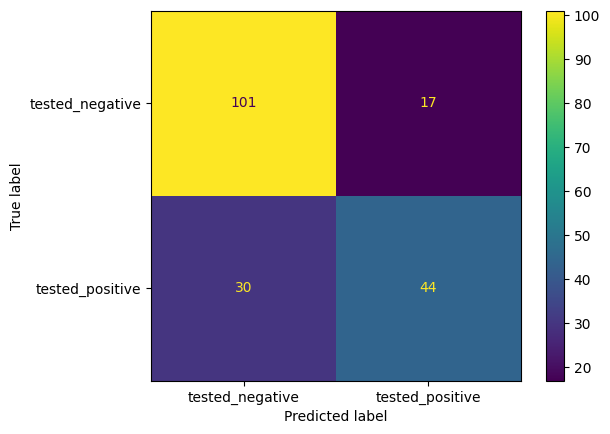

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Displaying the confusion matrix

cm = confusion_matrix(Y_test, Yhat, labels=rf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)

disp.plot()

plt.show()

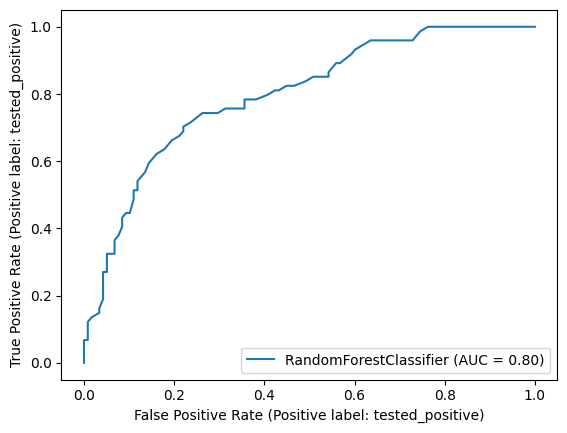

In [ ]:
# @title construindo curva ROC

from sklearn.metrics import RocCurveDisplay

#y_score = rf.decision_function(X_test)

#fpr, tpr, thresholds = metrics.roc_curve(y, pred)
#roc_auc = metrics.auc(fpr, tpr)
#display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
#...                                   estimator_name='example estimator')

RocCurveDisplay.from_estimator(rf, X_test, Y_test)

# display.plot()
# plt.show()

In [ ]:
# @title Implementar Regressão Logística

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# lr = make_pipeline(StandardScaler(), LogisticRegression())

#gerando o modelo (evitando regularizações)
lr = LogisticRegression(max_iter = 1000)

#treinando o modelo
lr.fit(X_train, Y_train)
#predição do conjunto teste
Yhat_lr = lr.predict(X_test)

coef = pd.DataFrame(lr.coef_)
coef.columns = X.columns

print(coef)


       preg      plas    pres      skin      insu      mass      pedi  \
0  0.113899  0.035161 -0.0238  0.001397 -0.000574  0.095006  0.496806   

        age  
0  0.031246  


In [ ]:
# @title implementar Naive Bayes

# importar biblliotecas
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report



# construir um modelo gaussiano
model = GaussianNB()

# treinar o modelo
model.fit(X_train, Y_train)

# realizar a predição
Y_predi = model.predict(X_test)

print(classification_report(Y_test, Y_predi))






                 precision    recall  f1-score   support

tested_negative       0.75      0.81      0.78       118
tested_positive       0.65      0.57      0.60        74

       accuracy                           0.71       192
      macro avg       0.70      0.69      0.69       192
   weighted avg       0.71      0.71      0.71       192



In [ ]:
# @title importar modelo knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

Yhat_knn = knn.predict(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# criar modelo SVM
svm_model = SVC(kernel='linear', probability= True)  # 'linear', 'poly', 'rbf', 'sigmoid', etc. are different kernel options

# treinar modelo
svm_model.fit(X_train, Y_train)

# GERAR PREVISÕES
predictions = svm_model.predict(X_test)


accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7552083333333334


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

metrics = pd.DataFrame(index = ['dt','rf','knn','lr'], columns = ['Acc','Prec','Rec','F1','AUC','AUPR'])

metrics.at['dt','Acc'] = accuracy_score(Y_test,arvore)
metrics.at['rf','Acc'] = accuracy_score(Y_test,Yhat)
metrics.at['knn','Acc'] = accuracy_score(Y_test,Yhat_knn)
metrics.at['lr','Acc'] = accuracy_score(Y_test,Yhat_lr)
metrics.at['NB','Acc'] = accuracy_score(Y_test,Y_predi)
metrics.at['SVM','Acc'] = accuracy_score(Y_test,predictions)


metrics.at['dt','Prec'] = precision_score(Y_test,arvore,pos_label='tested_positive')
metrics.at['rf','Prec'] = precision_score(Y_test,Yhat,pos_label='tested_positive')
metrics.at['knn','Prec'] = precision_score(Y_test,Yhat_knn,pos_label='tested_positive')
metrics.at['lr','Prec'] = precision_score(Y_test,Yhat_lr,pos_label='tested_positive')
metrics.at['NB','Prec'] = precision_score(Y_test,Y_predi,pos_label='tested_positive')
metrics.at['SVM','Prec'] = precision_score(Y_test,predictions,pos_label='tested_positive')


metrics.at['dt','Rec'] = recall_score(Y_test,arvore,pos_label='tested_positive')
metrics.at['rf','Rec'] = recall_score(Y_test,Yhat,pos_label='tested_positive')
metrics.at['knn','Rec'] = recall_score(Y_test,Yhat_knn,pos_label='tested_positive')
metrics.at['lr','Rec'] = recall_score(Y_test,Yhat_lr,pos_label='tested_positive')
metrics.at['NB','Rec'] = recall_score(Y_test,Y_predi,pos_label='tested_positive')
metrics.at['SVM','Rec'] = recall_score(Y_test,predictions,pos_label='tested_positive')

metrics.at['dt','F1'] = f1_score(Y_test,arvore,pos_label='tested_positive')
metrics.at['rf','F1'] = f1_score(Y_test,Yhat,pos_label='tested_positive')
metrics.at['knn','F1'] = f1_score(Y_test,Yhat_knn,pos_label='tested_positive')
metrics.at['lr','F1'] = f1_score(Y_test,Yhat_lr,pos_label='tested_positive')
metrics.at['NB','F1'] = f1_score(Y_test,Y_predi,pos_label='tested_positive')
metrics.at['SVM','F1'] = f1_score(Y_test,predictions,pos_label='tested_positive')

metrics.at['dt','AUC'] = roc_auc_score(Y_test,dt.predict_proba(X_test)[:, 1])
metrics.at['rf','AUC'] = roc_auc_score(Y_test,rf.predict_proba(X_test)[:, 1])
metrics.at['knn','AUC'] = roc_auc_score(Y_test,knn.predict_proba(X_test)[:, 1])
metrics.at['lr','AUC'] = roc_auc_score(Y_test,lr.predict_proba(X_test)[:, 1])
metrics.at['NB','AUC'] = roc_auc_score(Y_test,model.predict_proba(X_test)[:, 1])
metrics.at['SVM','AUC'] = roc_auc_score(Y_test,svm_model.predict_proba(X_test)[:, 1])

precision, recall, thresholds = precision_recall_curve(Y_test, dt.predict_proba(X_test)[:, 1],pos_label = 'tested_positive')
metrics.at['dt','AUPR'] = auc_score = auc(recall, precision)
precision, recall, thresholds = precision_recall_curve(Y_test, rf.predict_proba(X_test)[:, 1],pos_label = 'tested_positive')
metrics.at['rf','AUPR'] = auc_score = auc(recall, precision)
precision, recall, thresholds = precision_recall_curve(Y_test, knn.predict_proba(X_test)[:, 1],pos_label = 'tested_positive')
metrics.at['knn','AUPR'] = auc_score = auc(recall, precision)
precision, recall, thresholds = precision_recall_curve(Y_test, lr.predict_proba(X_test)[:, 1],pos_label = 'tested_positive')
metrics.at['lr','AUPR'] = auc_score = auc(recall, precision)
precision, recall, thresholds = precision_recall_curve(Y_test, model.predict_proba(X_test)[:, 1],pos_label = 'tested_positive')
metrics.at['NB','AUPR'] = auc_score = auc(recall, precision)
precision, recall, thresholds = precision_recall_curve(Y_test, svm_model.predict_proba(X_test)[:, 1],pos_label = 'tested_positive')
metrics.at['SVM','AUPR'] = auc_score = auc(recall, precision)

metrics


,Acc,Prec,Rec,F1,AUC,AUPR
dt,0.703125,0.688889,0.418919,0.521008,0.650137,0.665883
rf,0.755208,0.721311,0.594595,0.651852,0.797641,0.705671
knn,0.65625,0.558824,0.513514,0.535211,0.640861,0.563466
lr,0.744792,0.711864,0.567568,0.631579,0.790655,0.706598
NB,0.713542,0.646154,0.567568,0.604317,0.777027,0.65143
SVM,0.604167,0.481481,0.351351,0.40625,0.809265,0.737598
